Change The Value of b: 10
Ground State Energy: 99.67+0.00j eV
1st Excited State Energy: 237.30+0.00j eV
2nd Excited State Energy: 381.26+0.00j eV


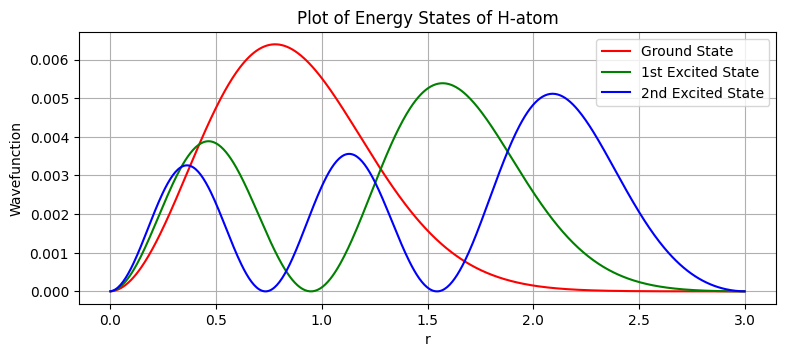

In [4]:
#Practicle No - 2
import numpy as np
from scipy import constants as const
from scipy.sparse import diags
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt

#Practicle No - 3
import numpy as np
from scipy import constants as const
from scipy.sparse import diags
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt

h = 197.3
m = 940
e = 3.795
rmin = -1e-9
rmax = 3
n = 500
k = 100
b = 10
r = np.linspace(rmin, rmax, n)
d = r[1] - r[0]

V = np.zeros((n, n))
for i in range(n):
    V[i, i] = ((k*r[i]**2)/2 + (b * r[i]**3) / 3)

# Kinetic Energy
K = np.zeros((n, n))
np.fill_diagonal(K, -2)  # Main diagonal with -2
np.fill_diagonal(K[1:], 1)  # Upper diagonal (offset by +1) with 1
np.fill_diagonal(K[:, 1:], 1)  # Lower diagonal (offset by +1) with 1

# Hamiltonian
H = -(h**2 / (2 * m * d**2)) * K + V
eigenvalues, eigenvectors = eigs(H, k=4, which='SR')

# Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print("Change The Value of b:", b)
print(f'Ground State Energy: {eigenvalues[0]:.2f} eV')
print(f'1st Excited State Energy: {eigenvalues[1]:.2f} eV')
print(f'2nd Excited State Energy: {eigenvalues[2]:.2f} eV')

plt.figure(figsize=(9, 12))

plt.subplot(3, 1, 1)
plt.plot(r, np.abs(eigenvectors[:, 0])**2, "r", label='Ground State')
plt.plot(r, np.abs(eigenvectors[:, 1])**2, "g", label='1st Excited State')
plt.plot(r, np.abs(eigenvectors[:, 2])**2, "b", label='2nd Excited State')
plt.title("Plot of Energy States of H-atom")
plt.xlabel('r')
plt.ylabel('Wavefunction')
plt.grid(True)
plt.legend()
plt.show()